In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1 : Reading and Understanding the Data 

In [2]:
# reading the data 
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Checking for nulls 
housing.isna().sum().sum()

0

In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


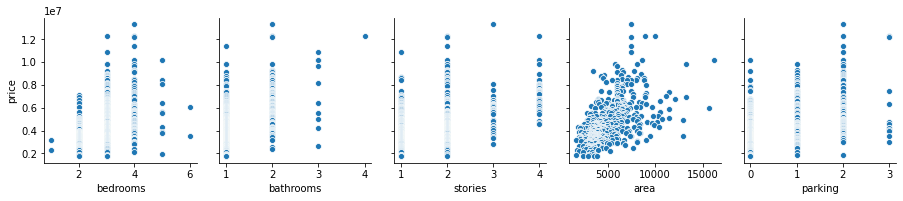

In [6]:
sns.pairplot(x_vars=["bedrooms", "bathrooms", "stories", "area", "parking"], y_vars="price", data=housing)

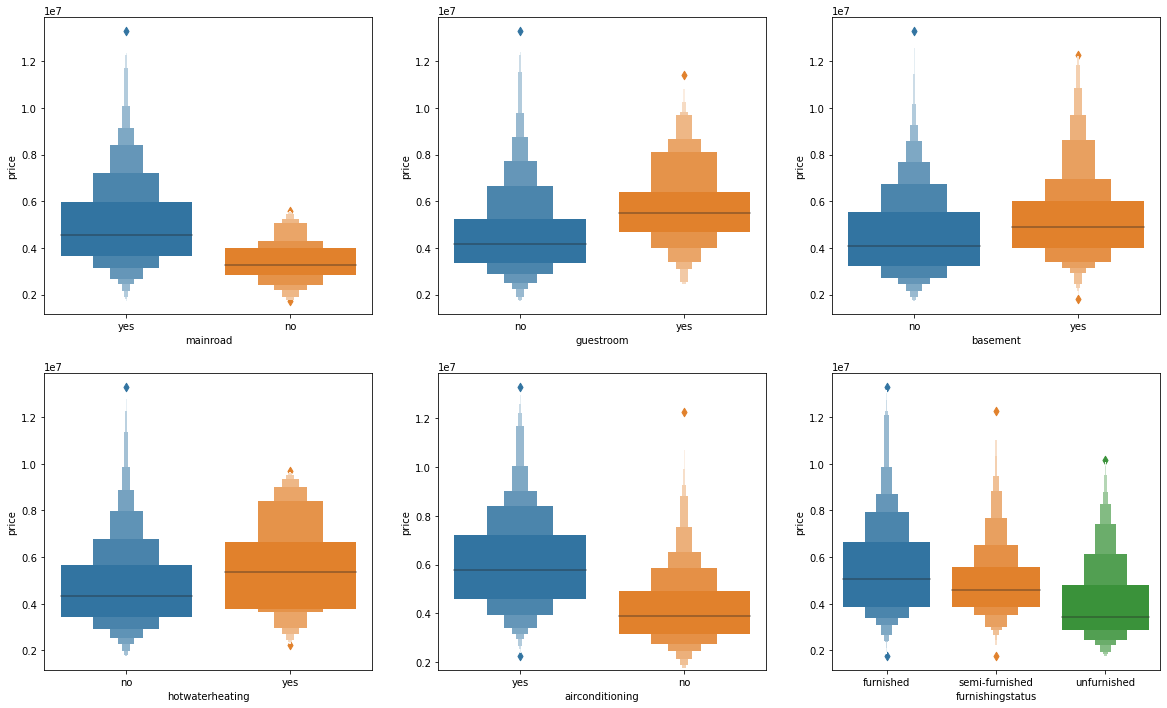

In [7]:
# Visualizing catgorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxenplot(x='mainroad', y= 'price', data=housing)
plt.subplot(2,3,2)
sns.boxenplot(x='guestroom', y= 'price', data=housing)
plt.subplot(2,3,3)
sns.boxenplot(x='basement', y= 'price', data=housing)
plt.subplot(2,3,4)
sns.boxenplot(x='hotwaterheating', y= 'price', data=housing)
plt.subplot(2,3,5)
sns.boxenplot(x='airconditioning', y= 'price', data=housing)
plt.subplot(2,3,6)
sns.boxenplot(x='furnishingstatus', y= 'price', data=housing)

Observation : It is evident that almost all factors here have some impact on our target variable price.  

# Step 2 : Preparing the data for Modelling 

Steps : 

- Encoding : 
    - Converting binary vars to 1/0
    - Other categorials to dummy vars 
- Splitting into train and test 
- Rescaling of data 

In [8]:
# Handling Binary categorical avrs 
bin_vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
housing[bin_vars] = housing[bin_vars].apply(lambda x: x.map({'yes':1, 'no':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


##  Creating dummy variable for furnishingstatus


In [9]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


00 : furnished 
01 : unfurnished
10 : semifurnished

In [10]:
housing = pd.concat([housing, status], axis=1)
housing = housing.drop('furnishingstatus', axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
df_train, df_test= train_test_split(housing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Rescaling 

Here we can observe that other than 'area' is in thousand where others are very small integer number 
So, coefficients of these variables will be very different, hence coef. of area will be smaller but others will be higher

In [12]:
var = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
scaler = MinMaxScaler()
df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

<ipython-input-12-9c23fe987424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[var] = scaler.fit_transform(df_train[var])
C:\Users\avdhesh.chouhan\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [13]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Will be using afterwards to preserve 
df_train_original, df_test_original = df_train, df_test

Now, All the max values are set to 1 and all the min values are 0. 

# Step 3: Training the Model 

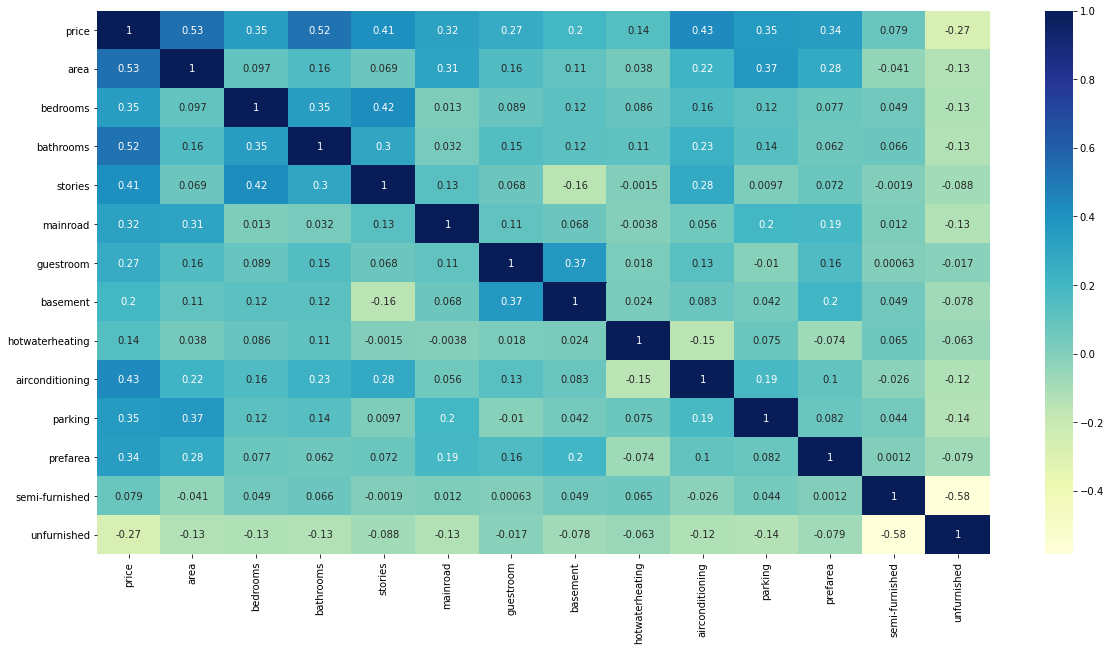

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [16]:
y_train = df_train.pop('price')
X_train = df_train

In [17]:
# Building a model with forward selection method - keep adding colums 
X_train_sm = sm.add_constant(X_train['area'])
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.15e-29
Time:                        04:00:47   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# R sqaured is not very good as it is 0.283, so lets improve it 
# add another variable 

X_train_sm = X_train[['area', 'bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.51e-54
Time:                        04:00:48   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have r square of 48 %, we should keep going

In [20]:
# add another variable 

X_train_sm = X_train[['area', 'bathrooms', 'bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.12e-57
Time:                        04:00:48   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, r square is gone upto 50 % 

In [21]:
# Building a model with backward selection method - start with all and keep removing 

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           8.83e-83
Time:                        04:00:48   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X_train = X_train.drop(['semi-furnished'], axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.07e-83
Time:                        04:00:48   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [23]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


Bedrooms have a high VIF,>5 so it should be dropped 

In [25]:
X_train = X_train.drop('bedrooms', axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           2.73e-84
Time:                        04:00:48   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Again checking for VIF  

In [26]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [27]:
# Basement has a high p value of 0.3, ie > 0.05 so dropping it as well 
X_train = X_train.drop('basement', axis=1)
X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train, X_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           3.13e-84
Time:                        04:00:48   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now, all VIFs are below 5, and r squared is 67% which is good. So, we can say our model is ready 

# Step 7 : Residual Analysis of train data 

Text(0.5, 0, 'Errors')

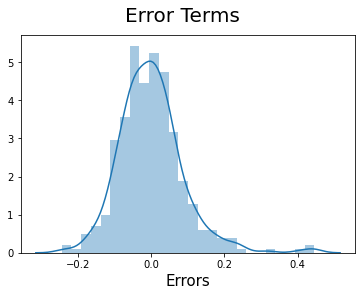

In [29]:
y_train_pred = lr_model.predict(X_train_sm) 
residual = y_train - y_train_pred
plt.figure()
sns.distplot(residual)
plt.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=15)

So, the residuals are following out assumptions 
-  Following a normal dist
- Centered around mean with SD of 1.


# Step 7 :  Making predictions using final model 

In [30]:
# Some test data preprocessing 
# scaling needs to be done for test data as well as the coef are calculated using the scaled values 
var = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_test[var] = scaler.transform(df_test[var])
y_test = df_test.pop("price")
X_test = df_test
print(X_test.shape)
print(y_test.shape)

(164, 13)
(164,)


<ipython-input-30-67e9fd08564a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var] = scaler.transform(df_test[var])
C:\Users\avdhesh.chouhan\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
X_test = X_test.drop(["bedrooms", "basement", "semi-furnished"], axis=1)
X_test_sm = sm.add_constant(X_test)
X_test_sm.describe()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
count,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,1.0,0.298548,0.158537,0.268293,0.865854,0.195122,0.030488,0.353659,0.205285,0.237805,0.329268
std,0.0,0.211922,0.281081,0.276007,0.341853,0.397508,0.172452,0.479569,0.289322,0.427043,0.471387
min,1.0,-0.016367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.148011,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.259724,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.397439,0.500000,0.333333,1.000000,0.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.0,1.263992,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


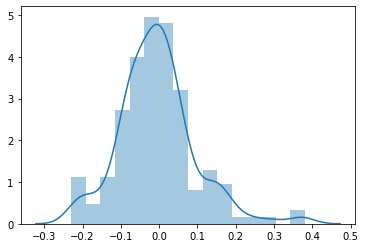

In [32]:
y_test_pred = lr_model.predict(X_test_sm)
residual = y_test - y_test_pred
sns.distplot(residual)

Text(0, 0.5, 'y_test_pred')

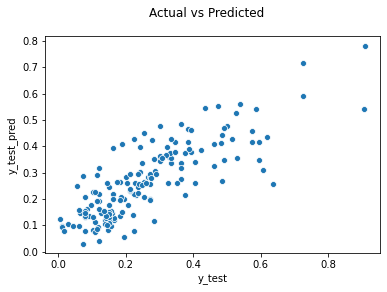

In [33]:
plt.figure()
sns.scatterplot(y_test, y_test_pred)
plt.suptitle("Actual vs Predicted")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")

# RFE 

In [40]:
X_train_rfe = df_train_original
y_train_rfe = y_train

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train_rfe, y_train)

C:\Users\avdhesh.chouhan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [44]:
list(zip(X_train_rfe.columns,rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [45]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [47]:
X_train_rfe.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [50]:
X_train_rfe = X_train_rfe[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           1.28e-82
Time:                        04:12:15   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# drop bedroom as it has high p value > 0.05
X_train_rfe = X_train_rfe.drop("bedrooms", axis=1)

In [52]:
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           6.67e-83
Time:                        04:13:54   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculating the vif again 
vif = pd.DataFrame()
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12
